<a href="https://colab.research.google.com/github/Cill19/Analisis-Perilaku-Pembelian-B2B-Business-to-Business-Insights-/blob/main/latihan_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Siapkan Dataset

In [6]:
import pandas as pd
import numpy as np


In [8]:
#upload file dari lokal
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving retail_store_sales.csv to retail_store_sales (1).csv
User uploaded file "retail_store_sales (1).csv" with length 1192883 bytes


In [11]:
# Mengambil nama file yang diunggah
file_name = next(iter(uploaded))

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv(file_name)

# Menampilkan beberapa baris pertama DataFrame
display(df.head())

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


## 2. cek missing values

In [12]:
df.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


oke dari info dataframe di atas kan udah keliatan tuh mana kolom yang punya missing value. cara taunya gimana? len(df) > non null columnt. atau liat jumlah data nya kalo tidak sama berarti ada missing value
contoh dari df di atas sih kolom ini ada missing value:
Item, Price Per Unit, Quantity, Total Spent, dan Discount Applied
  

setelah tau adanya missing value per kolom, lanjutkan dengan analisis lebih lanjut yaitu berapa sih jumlah data yang hilang, kalo bisa sih dipersentase

In [13]:
missing_count = df.isna().sum()
missing_pct   = (missing_count / len(df) * 100).round(2)
pd.DataFrame({'missing_count': missing_count, 'missing_pct': missing_pct}).sort_values('missing_pct', ascending=False)

,missing_count,missing_pct
Discount Applied,4199,33.39
Item,1213,9.65
Price Per Unit,609,4.84
Total Spent,604,4.80
Quantity,604,4.80
Transaction ID,0,0.00
Customer ID,0,0.00
Category,0,0.00
Payment Method,0,0.00
Location,0,0.00


In [14]:
# 1. Isi Discount Applied
df['Discount Applied'] = df['Discount Applied'].fillna('No')

# 2. Isi Item dengan mode per Category
df['Item'] = df.groupby('Category')['Item'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown Item'))

# 3. Isi Price Per Unit dengan median per Category
df['Price Per Unit'] = df.groupby('Category')['Price Per Unit'].transform(lambda x: x.fillna(x.median()))

# 4. Hitung Quantity dan Total Spent jika kosong
df.loc[df['Quantity'].isna(), 'Quantity'] = df['Total Spent'] / df['Price Per Unit']
df.loc[df['Total Spent'].isna(), 'Total Spent'] = df['Price Per Unit'] * df['Quantity']

# 5. Konversi tanggal ke format datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              12575 non-null  object        
 4   Price Per Unit    12575 non-null  float64       
 5   Quantity          11971 non-null  float64       
 6   Total Spent       11971 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  12575 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.1+ MB


In [19]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,No
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [20]:
df.describe()

,Price Per Unit,Quantity,Total Spent,Transaction Date
count,12575.000000,11971.000000,11971.000000,12575
mean,23.382664,5.536380,129.652577,2023-07-12 20:23:41.105368064
min,5.000000,1.000000,5.000000,2022-01-01 00:00:00
25%,14.000000,3.000000,51.000000,2022-09-30 00:00:00
50%,23.000000,6.000000,108.500000,2023-07-13 00:00:00
75%,32.000000,8.000000,192.000000,2024-04-24 00:00:00
max,41.000000,10.000000,410.000000,2025-01-18 00:00:00
std,10.485808,2.857883,94.750697,NaN


In [21]:
df.nunique()

,0
Transaction ID,12575
Customer ID,25
Category,8
Item,200
Price Per Unit,25
Quantity,10
Total Spent,227
Payment Method,3
Location,2
Transaction Date,1114


## EDA

In [23]:
# Total pendapatan
df['Total Spent'].sum()



np.float64(1552071.0)

In [24]:

# Rata-rata pembelian per transaksi
df['Total Spent'].mean()


np.float64(129.6525770612313)

In [25]:

# Penjualan tertinggi berdasarkan kategori
df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)

,Total Spent
Category,
Butchers,208118.0
Electric household essentials,203813.5
Beverages,197047.5
Furniture,195310.0
Food,194812.0
Computers and electric accessories,190692.5
Patisserie,182165.5
Milk Products,180112.0


In [26]:
# Rata-rata pembelian per Customer ID
df.groupby('Customer ID')['Total Spent'].mean().head()


,Total Spent
Customer ID,
CUST_01,121.095876
CUST_02,132.861884
CUST_03,136.347534
CUST_04,135.752747
CUST_05,129.795543


In [27]:

# Metode pembayaran paling sering digunakan
df['Payment Method'].value_counts(normalize=True) * 100


,proportion
Payment Method,
Cash,34.274354
Digital Wallet,32.954274
Credit Card,32.771372


<Axes: xlabel='Month'>

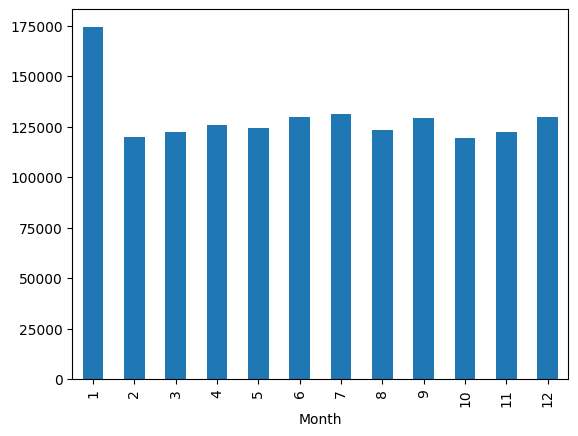

In [31]:
# Pastikan tanggal sudah datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Buat kolom bulan & tahun
df['Month'] = df['Transaction Date'].dt.month
df['Year'] = df['Transaction Date'].dt.year

# Total penjualan per bulan
df.groupby('Month')['Total Spent'].sum().plot(kind='bar')



<Axes: xlabel='Total Spent', ylabel='Count'>

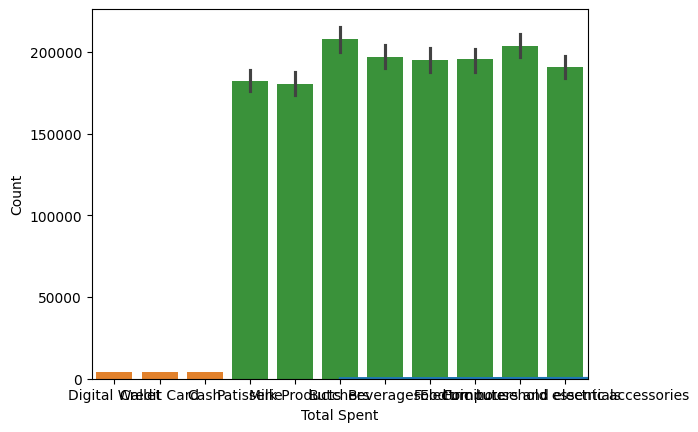

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi total belanja
sns.histplot(df['Total Spent'], kde=True)

# Perbandingan metode pembayaran
sns.countplot(x='Payment Method', data=df)

# Penjualan per kategori
sns.barplot(x='Category', y='Total Spent', data=df, estimator=sum)


In [33]:
df.to_csv('cleaned_sales.csv', index=False)
